In [2]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv(r"C:\Users\mandi\OneDrive\Desktop\project1\shopping.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df["Revenue"].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [6]:
df.dropna(inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [8]:

from sklearn.preprocessing import LabelEncoder


for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)




In [10]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


In [11]:
x = df.drop(["Revenue"], axis = 1)
y = df["Revenue"]

In [12]:
# from sklearn.preprocessing import LabelEncoder
# for col in df.select_dtypes(include='object').columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])

In [13]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


In [15]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>],
       [<Axes: title={'center': 'PageValues'}>,
        <Axes: title={'center': 'SpecialDay'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'OperatingSystems'}>],
       [<Axes: title={'center': 'Browser'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'TrafficType'}>,
        <Axes: title={'center': 'VisitorType'}>],
       [<Axes: title={'center': 'Weekend'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

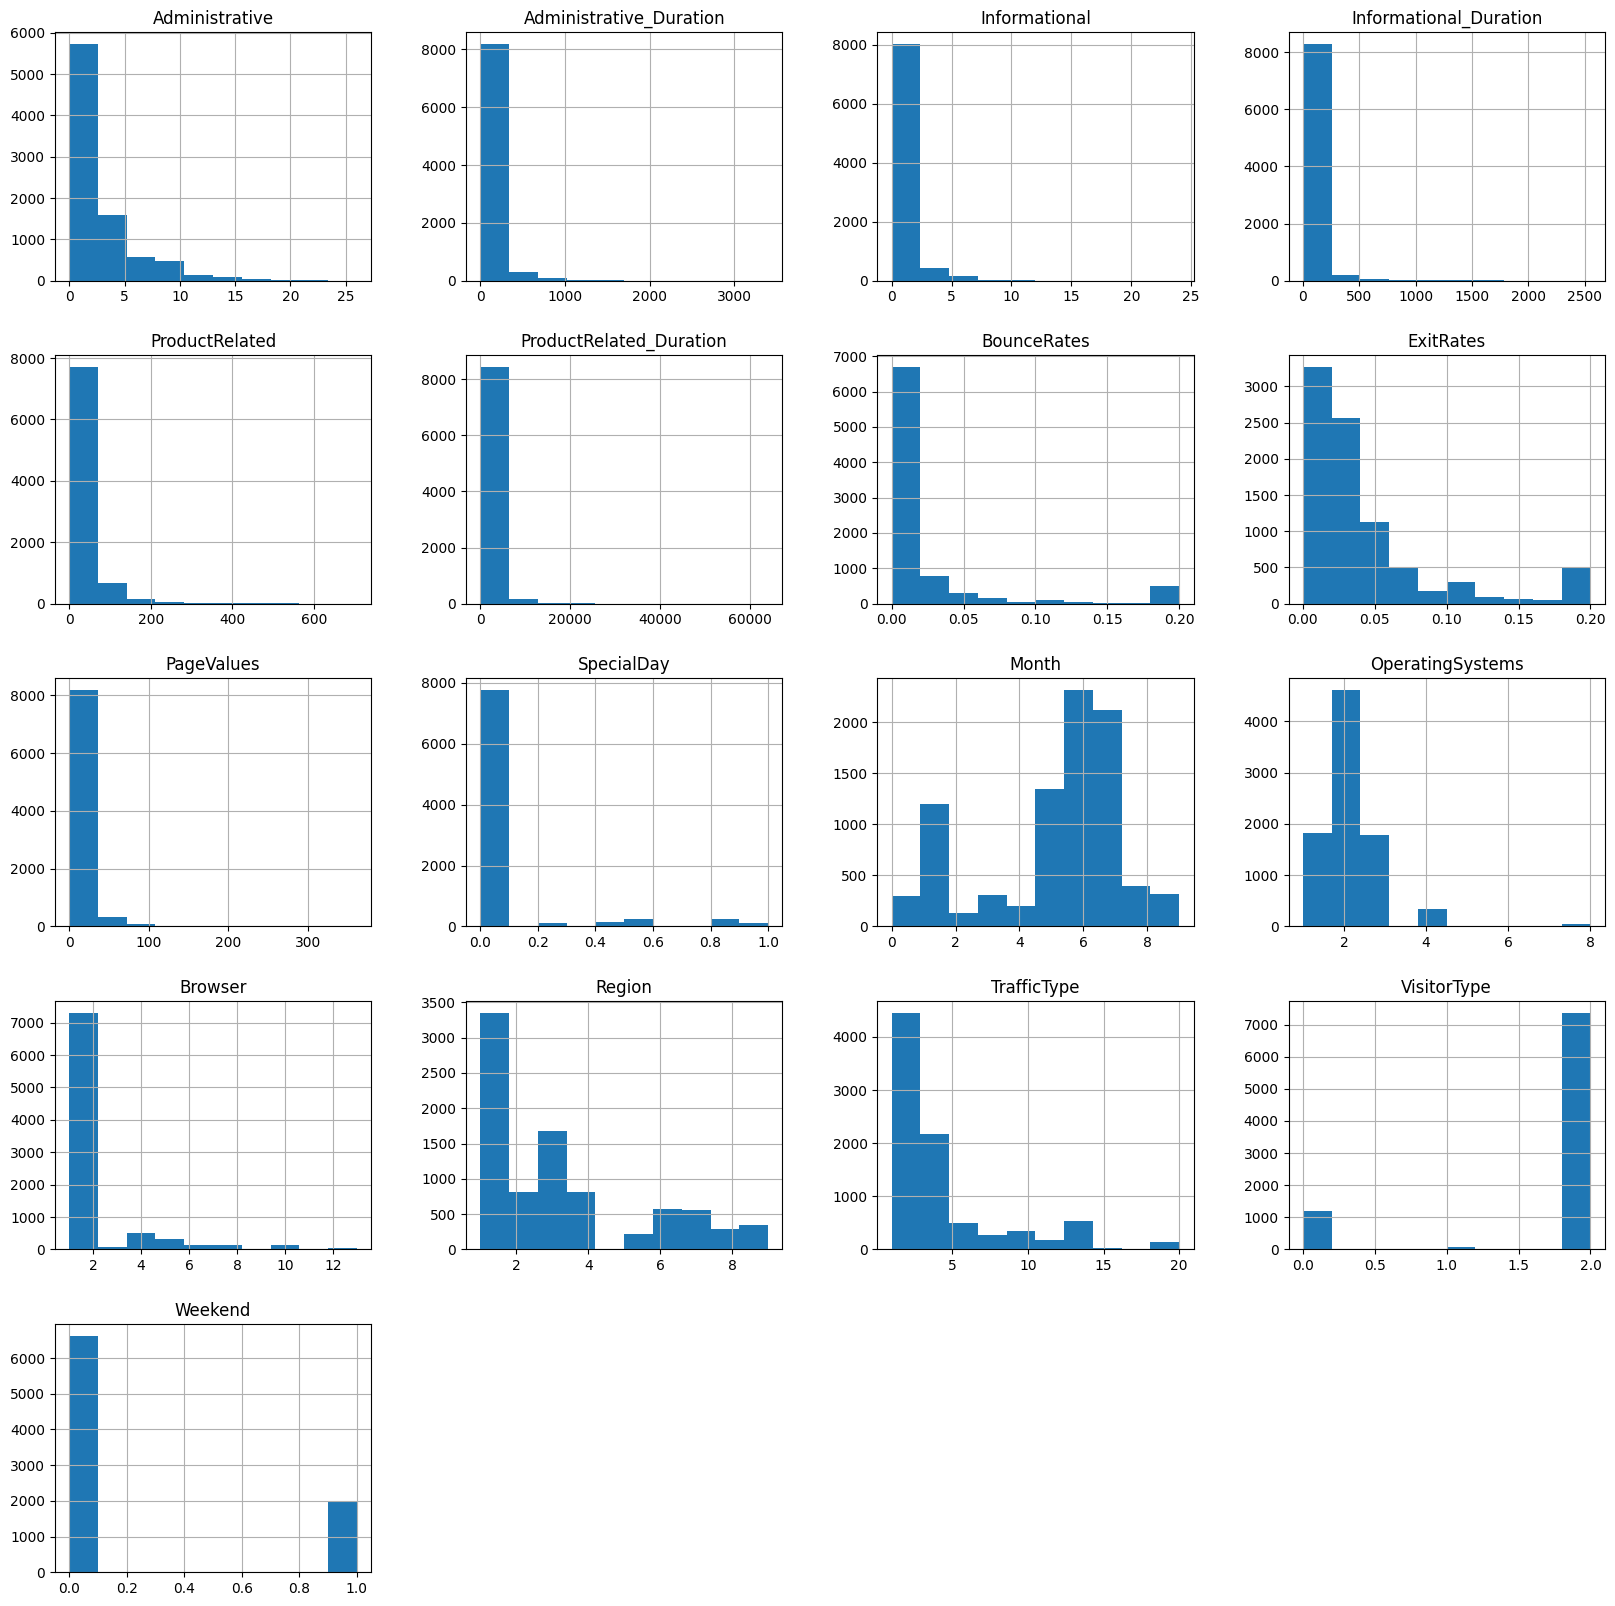

In [18]:
x_train.hist(figsize=(20,20))

In [19]:
model = KNeighborsClassifier(n_neighbors=5,metric="manhattan")

In [20]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [21]:
y_train = np.array(y_train).astype(int)

In [22]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
x_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
1267,5,487.500000,0,0.0,11,500.000000,0.000000,0.015385,0.000000,0.0,5,1,8,1,11,0,0
3222,1,46.000000,0,0.0,17,931.000000,0.027778,0.062963,0.000000,0.0,6,3,2,1,13,2,0
7259,3,42.400000,0,0.0,20,331.891429,0.000000,0.004762,0.000000,0.0,0,2,2,8,1,2,1
8507,2,128.500000,0,0.0,7,209.000000,0.027778,0.053439,0.000000,0.0,7,3,2,3,2,2,0
5555,10,340.900000,3,269.8,99,3611.978569,0.000641,0.002106,0.847338,0.0,4,2,2,1,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,6,99.333333,1,28.5,5,345.500000,0.000000,0.011111,0.000000,0.0,5,2,2,3,8,0,0
4619,0,0.000000,0,0.0,4,6.000000,0.100000,0.150000,0.000000,0.2,6,2,2,3,13,2,0
6819,0,0.000000,0,0.0,258,3637.985674,0.000781,0.008679,0.000000,0.0,4,2,2,3,3,2,0
7999,3,60.000000,0,0.0,66,2339.805556,0.012121,0.034848,0.000000,0.0,7,2,2,1,2,2,0


In [24]:
model.fit(x_train, y_train)


KNeighborsClassifier(metric='manhattan')

In [25]:
x_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
1267,5,487.500000,0,0.0,11,500.000000,0.000000,0.015385,0.000000,0.0,5,1,8,1,11,0,0
3222,1,46.000000,0,0.0,17,931.000000,0.027778,0.062963,0.000000,0.0,6,3,2,1,13,2,0
7259,3,42.400000,0,0.0,20,331.891429,0.000000,0.004762,0.000000,0.0,0,2,2,8,1,2,1
8507,2,128.500000,0,0.0,7,209.000000,0.027778,0.053439,0.000000,0.0,7,3,2,3,2,2,0
5555,10,340.900000,3,269.8,99,3611.978569,0.000641,0.002106,0.847338,0.0,4,2,2,1,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,6,99.333333,1,28.5,5,345.500000,0.000000,0.011111,0.000000,0.0,5,2,2,3,8,0,0
4619,0,0.000000,0,0.0,4,6.000000,0.100000,0.150000,0.000000,0.2,6,2,2,3,13,2,0
6819,0,0.000000,0,0.0,258,3637.985674,0.000781,0.008679,0.000000,0.0,4,2,2,3,3,2,0
7999,3,60.000000,0,0.0,66,2339.805556,0.012121,0.034848,0.000000,0.0,7,2,2,1,2,2,0


In [26]:
x_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
10830,0,0.000000,0,0.0,6,192.083333,0.044444,0.035556,0.000000,0.0,7,3,2,1,2,2,0
3185,15,1629.333333,3,214.5,112,4509.823016,0.004167,0.019960,0.000000,0.0,6,4,1,3,3,2,0
5043,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,6,2,2,1,3,2,0
8105,0,0.000000,0,0.0,8,493.750000,0.000000,0.050000,0.000000,0.0,7,2,2,4,20,1,0
11918,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,7,8,2,9,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,2,77.000000,0,0.0,32,1223.416667,0.000000,0.010784,215.009412,0.0,6,3,2,4,2,2,0
8811,0,0.000000,0,0.0,8,1066.250000,0.000000,0.028571,9.084768,0.0,7,1,8,4,11,2,1
7920,2,63.500000,0,0.0,9,99.066667,0.036364,0.072727,0.000000,0.0,8,1,1,1,4,2,0
5656,2,194.900000,0,0.0,14,227.333333,0.000000,0.009184,0.000000,0.0,7,1,1,4,3,2,0


In [27]:

y_pred = model.predict(x_test)


In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 85.62%


In [29]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.1438226547715599

In [30]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.14
Mean Squared Error: 0.14
R² Score: -0.07
